В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
%matplotlib notebook


In [2]:
X = pd.read_csv('weather.csv')

In [3]:
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})

In [4]:
del X['RainTomorrow']


In [5]:
X.head()


,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [6]:
X, y = make_classification(n_samples=2000)
#size, dim = X.shape
#batch = np.random.choice(size, 10, replace=False)
#print(X[batch])
#preprocessing.normalize(X[batch],axis=1)
print(X)
print(y)

[[ 0.51516739  0.70718542  1.15962894 ...  0.85414792 -0.07731149
   1.81212263]
 [-1.37910118 -0.36217135 -0.11018662 ... -0.46718607 -0.11427388
   1.74876772]
 [ 0.13884541  0.62085217 -0.56849994 ...  1.03440303 -0.0192235
  -0.84407286]
 ...
 [ 0.1090818  -0.33695552  0.22387734 ... -0.38814948 -0.04571221
  -0.75099302]
 [-0.51927084  0.20608423  0.18843983 ...  1.05757869  0.60539173
   1.17297661]
 [-0.77573439  1.54171446 -1.22163004 ...  0.7540063   0.72019507
  -0.91535788]]
[1 1 0 ... 0 1 0]


### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [7]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, -1, -1])


In [8]:

def probability(theta, X):
    result=np.zeros(len(X))
    for i in range(len(X)):
        result[i]=1/(1+math.exp(-np.matmul(theta,X[i])))
    return result
prob = probability(theta, X)
print(prob)


assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

[9.97527377e-01 1.19202922e-01 7.31058579e-01 3.05902227e-07]


Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [9]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    return (prob > threshold).astype(int)

y_pred = binary_class_prediction(theta, X)
print(y_pred)


assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

[1 0 1 0]


__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [10]:
def logloss(theta, X, y,class_labels={"negative": 0, "positive": 1}): 
    y_copy = y.copy()
    y_copy[y_copy == class_labels["negative"]] = -1
    y_copy[y_copy == class_labels["positive"]] = 1
    return np.mean(np.log(1 + np.exp(-y_copy * np.dot(X, theta))))
round(logloss(theta, X, y),3)

0.861

In [11]:
assert round(logloss(theta, X, y),3) == 0.861, 'Функция считается неверно'

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:

In [12]:
def gradient(theta, X, y, class_labels={"negative": 0, "positive": 1}):
    y_copy = y.copy()
    y_copy[y_copy == class_labels["negative"]] = -1
    y_copy[y_copy == class_labels["positive"]] = 1
    margin = y_copy * np.dot(X, theta)
    return -np.sum([(y_copy * np.exp(-margin) / (1 + np.exp(-margin))).reshape(-1, 1) * X], axis=1)[0] / X.shape[0]

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

Функция обучения уже реализована

In [13]:
def fit(X, y, batch_size=10, h=0.05,  iters=100,class_labels={"negative": 0, "positive": 1}, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        X_norm=preprocessing.normalize(X[batch],axis=1)
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch,class_labels)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y,class_labels)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

In [5]:
#X, y = make_classification(n_samples=2000)

X = pd.read_csv('weather.csv')
print(type(X))
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})
del X['RainTomorrow']
const=X.drop(['Unnamed: 0','Evaporation','Sunshine'],axis=1).copy()
const.fillna({'MinTemp':0,'MaxTemp':0,'Rainfall':0,'WindGustSpeed':0,'WindSpeed9am':0,
              'WindSpeed3pm':0,'Cloud9am':0,'Cloud3pm':0,'Humidity9am':0,'Humidity3pm':0,
              'Pressure9am':0,'Pressure3pm':0,'Temp9am':0,'Temp3pm':0,'Location':'Albury','WindGustDir':'W',
             'WindDir9am':'W','WindDir3pm':'W','RainToday':'No'},inplace=True)
del const['Location']
del const['WindGustDir']
del const['WindDir9am']
del const['WindDir3pm']
del const['RainToday']
#const.Location.replace({'NaN':np.random.choice(X['Location'],1)[0]})
#const_new=pd.get_dummies(const,columns=["WindGustDir","WindDir9am","WindDir3pm","RainToday"])
const_new=const
for i in range(len(const_new['Date'])):
    const_new['Date'][i]=(int(const_new['Date'][i][0:4])-2005)*365+int(const_new['Date'][i][5:7])*30+int(const_new['Date'][i][8:10])
X=const_new
X=preprocessing.normalize(const_new,axis=1)
print(X)
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
[[7.13896035e-01 6.57019703e-03 1.12281725e-02 ... 0.00000000e+00
  8.28629327e-03 1.06888280e-02]
 [7.13804984e-01 3.62536505e-03 1.22968463e-02 ... 0.00000000e+00
  8.42652418e-03 1.19049150e-02]
 [7.14345111e-01 6.32033740e-03 1.25916799e-02 ... 9.79897272e-04
  1.02889214e-02 1.13668084e-02]
 ...
 [9.53621006e-01 7.49243916e-04 5.26551974e-03 ... 0.00000000e+00
  2.26854408e-03 5.09902109e-03]
 [9.53825115e-01 1.12386114e-03 5.59849348e-03 ... 0.00000000e+00
  2.60153043e-03 5.43199553e-03]
 [9.53936720e-01 1.62319075e-03 5.61873723e-03 ... 4.16202757e-04
  3.14233082e-03 5.41063585e-03]]
(142193, 15)


<IPython.core.display.Javascript object>


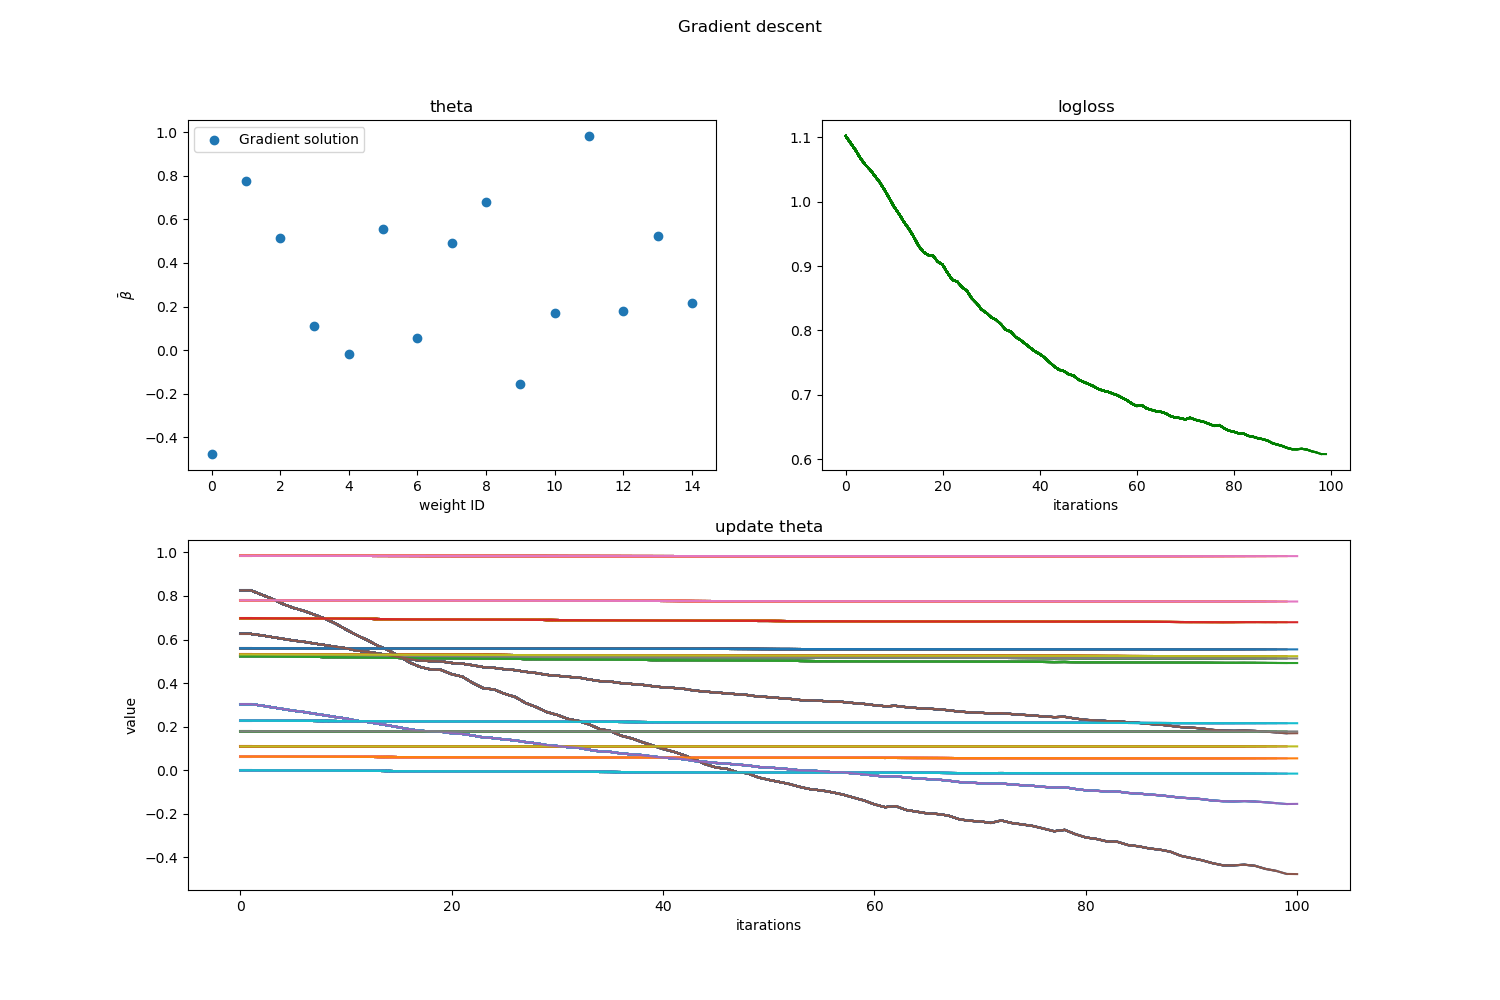

In [17]:
optimal_theta = fit(X_train, y_pred)

In [53]:
y_pred=np.array(y[0:100000])
print(type(X))
print(type(y_pred))
#np.random.choice(X['Location'],1)[0]
#X.Location.replace({'NaN':np.random.choice(X['Location'],1)[0]})
#X.info()
X_train=X[0:100000]
X_test=X[100001:]
X.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(142193, 15)

# Логистическая регрессия

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred=logreg.predict(X_test)
print(logreg.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.776603439961421
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     77197
           1       0.67      0.01      0.02     22339

    accuracy                           0.78     99536
   macro avg       0.72      0.50      0.45     99536
weighted avg       0.75      0.78      0.68     99536



# Наивный Байес

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=0)
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [7]:
y_pred=gnb.predict(X_test)
print(gnb.score(X_test,y_test))
print(classification_report(y_test,y_pred))

0.7781104324063656
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     77197
           1       0.51      0.36      0.42     22339

    accuracy                           0.78     99536
   macro avg       0.67      0.63      0.64     99536
weighted avg       0.76      0.78      0.76     99536



In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.7,random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)

nca_pipe=Pipeline([('nca',nca),('knn',knn)])
nca_pipe.fit(X_train,y_train)

In [ ]:
y_pred=nca.predict(X_test)
print(nca.score(X_test,y_test))
print(classification_report(y_test,y_pred))